# Численное дифференциирование и погрешности

## План

1. Численное дифференциирование
2. Погрешность метода
3. Погрешность машинного округления
4. Погрешность данных. Шум.
5. Задачи

## 1. Численное дифференциирование

### _Постановка задачи для 1-ой производной_

Пусть таблично задана некоторая функция $u(x)$:

$$
\begin{array}{|l|l|l|l|l|l|l|l|}
\hline u(x) & u\left(x_0\right) & u_1 & u_2 & \cdots & u_j & \cdots & u_J \\
\hline x & x_0 & x_1 & x_2 & \cdots & x_j & \cdots & x_J \\
\hline
\end{array}
$$

Как раз в такой форме задана любая функция в компьютере (массив "иксов" и массив "игреков"). Отметим, что разбиение по "иксам" может быть как равномерным, так и неравномерным - всё зависит от конкретной табдично заданной функции.

Хотим вычислить её производную в каждой точке $x_j$. Вспомним определение из матанализа:

$$u'\left(x_j\right)=\lim _{\Delta x \rightarrow 0} \frac{u\left(x_j+\Delta x\right)-u\left(x_j\right)}{\Delta x}$$

Но ведь на компьютере $\Delta x$ не может стремится к нулю, т.к. функция по сути дискретная, - придётся считать приближённо, с помощью аппроксимации производной путём использования __конечно-разностных схем__. Некоторые примеры:

a) $u_j^{(1)}=\frac{u_j-u_{j-1}}{x_j-x_{j-1}}=\frac{u_j-u_{j-1}}{h}$

b) $u_j^{(1)}=\frac{u_{j+1}-u_j}{x_{j+1}-x_j}=\frac{u_{j+1}-u_j}{h}$

c) $u_j^{(1)}=\frac{u_{j+1} - u_{j-1}}{x_{j+1}-x_{j-1}}=\frac{u_{j+1}-u_{j-1}}{2 h}$

Подчеркнём разницу между обозначениями $u'$ и $u^{(1)}$. $u'$ - это истинная (математическая) производная, а $u^{(1)}$ - это лишь аппроксимация (наше приблежение).

### _Порядок аппроксимации_

Чем же отличаются данные схемы? Оказывается, точностью. Но сначала вспомним про ряд Тейлора с остаточным членом в форме Лагранжа и Пеано:

$$
\begin{aligned}
&u\left(x_j+\Delta x\right)=u\left(x_j\right)+u^{\prime}\left(x_j\right) \cdot \Delta x+u^{\prime \prime}\left(x_j\right) \frac{\Delta x^2}{2 !} 
+u^{\prime \prime \prime}\left(x_j\right) \frac{\Delta x^3}{3 !}+\cdots+u^{(n)}\left(x_i\right) \frac{\Delta x^n}{n !}+\frac{u^{(n+1)}(\xi)}{(n+1) !} \Delta x^{n+1}=\sum_{k=0}^n \frac{u^{(k)}\left(x_j\right)}{k !} \Delta x^k+O\left(\Delta x^{n+1}\right)
\end{aligned}
$$

Подставляя это разложение в наши примеры, посмотрим на их "точность":

---

a) $u_j^{(1)}=\frac{u_j-u_{j-1}}{x_j-x_{j-1}}=\frac{u_j-u_{j-1}}{h}$

$
u_{j-1}=u\left(x_{j-1}\right)=u(x_j - h)=u_j-h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}-\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)
$

$u_j^{(1)}=\frac{u_j-u_{j-1}}{h}=\frac{u_j-(u_j-h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}-\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right))}{h} = u_j^{\prime}-\frac{h u_j^{\prime \prime}}{2}+\frac{h^2}{6} u_j^{\prime \prime \prime} +o(h^3) \approx u_j^{\prime}+O(h)$

Видим, что при $h \rightarrow 0$ наша аппроксимация стремится к истинной производной. В данном случае эта разностная схема имеет __1-ый порядок аппроксимации__, т.к. ошибка пропорциональна первой степени $h$.

---

b) $u_j^{(1)}=\frac{u_{j+1}-u_j}{x_{j+1}-x_j}=\frac{u_{j+1}-u_j}{h}$

$
u_{j+1}=u\left(x_{j+1}\right)=u(x_j + h)=u_j+h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}+\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)
$

$u_j^{(1)}=\frac{u_{j+1}-u_j}{h}=\frac{(u_j+h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}+\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)) - u_j}{h} = u_j^{\prime}+\frac{h u_j^{\prime \prime}}{2}+\frac{h^2}{6} u_j^{\prime \prime \prime} +O(h^3) \approx u_j^{\prime}+O(h)$

Опять получился 1-ый порядок аппроксимации. 

---

c) $u_j^{(1)}=\frac{u_{j+1} - u_{j-1}}{x_{j+1}-x_{j-1}}=\frac{u_{j+1}-u_{j-1}}{2 h}$

$
u_{j+1}=u\left(x_{j+1}\right)=u(x_j + h)=u_j+h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}+\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)
$

$
u_{j-1}=u\left(x_{j-1}\right)=u(x_j - h)=u_j-h u_j^{\prime}+\frac{h^2}{2} u_j^{\prime \prime}-\frac{h^3}{6} u_j^{\prime \prime \prime}+O\left(h^4\right)
$

$u_j^{(1)}=\frac{u_{j+1}-u_{j-1}}{2h}=u_j^{\prime}+\frac{h^2}{6} u_j^{\prime \prime \prime}+o(h^2)=u_j^{\prime}+O(h^2)$

Получился __2-ой порядок аппроксимации__ - то есть эта разностная аппроксимация на порядок точнее двух предыдущих. К примеру, без учёта констант перед $h$, если в a) и b) ошибка была бы $10^{-3}$, то в с) на том же наборе данных мы бы имели ошибку $10^{-6}$.

---

Итого мы поняли, что задачу приближённого нахождения производной (аппроксимации производной) можно решать с помощью конечно-разностных схем. Разные схемы могут иметь разную точность. Обобщим задачу на случай производной произвольной степени.

### _Постановка задачи для k-ой производной_

Пусть таблично задана некоторая функция $u(x)$:

$$
\begin{array}{|l|l|l|l|l|l|l|l|}
\hline u(x) & u\left(x_0\right) & u_1 & u_2 & \cdots & u_* & \cdots & u_J \\
\hline x & x_0 & x_1 & x_2 & \cdots & x_* & \cdots & x_J \\
\hline
\end{array}
$$

Хотим приближенно найти производную $k$-го порядка в точке $x_*$. Будем искать решение в виде конечно-разностной схемы:


$$u^{(k)}\left(x_*\right)=u_*^{(k)}=\frac{\overset{m}{\underset{j \,=-l}{\sum}} \alpha_j \cdot u\left(x_*+\Delta x_j\right)}{h^k}$$

Здесь $\alpha_j$ - некоторые числовые коэффициенты, которые определяют вид конечно-разностной схемы. Как же их найти?

__Алгоритм составления разностной схемы__

1. Фиксировать $l$ и $m$ исходя из п.3 ниже.
2. Разложить $u\left(x_*+\Delta x_j\right)$ в ряд Тейлора в точке $x_*$. Привести множители перед производными.
3. Составить систему линейных уравнений на $\alpha_j$ исходя из 
- зануления скобок перед производными порядка меньше k 
- равенства скобки единице перед искомой k-ой производной
- занулению скобок перед некоторым количеством производных порядка выше k для увеличения точности.
4. Решить эту систему аналитически $\rightarrow$ найти $\alpha_j$ $\rightarrow$ схема задана.

Если же в нашей функции нет фиксированного шага по "искам" $h$, то меняется лишь изначальная формула, откуда $h$ пропадает из знаменателя, и остаётся только числитель. В остальном алгоритм такой-же. Более подробно см. лекцию С1 https://vk.com/video/@club101906738?z=video-101906738_456239046%2Fclub101906738%2Fpl_-101906738_-2.

Вообще, все эти задачи для различных $k, l, m$ давно решены за нас. Достаточно загуглить "конечно-разностные схемы".

### _k-ая производная функция нескольких переменных_

В целом "дух", алгоритм и понятие порядка аппроксимации абсолютно такие же как и в предыдущих пунктах, только теперь необходимо рассматривать различные шаги $h_1, h_2, ...$ по разным осям. Также в рядах Тейлора появятся перекрестные слагаемые. За более подробным описанием см. лекцию С1 https://vk.com/video/@club101906738?z=video-101906738_456239046%2Fclub101906738%2Fpl_-101906738_-2

## 2. Погрешность метода 

На основе презентации Ивана Цыбулина, Ярослава Холодова.

Многие методы вычислительной математики являются приближенными, то есть позволяют получить ответ с заданной точностью. Крайне важно уметь определять погрешность, обусловленную использованием приближенного метода. Такая погрешность называется **ошибкой метода**. По сути это есть разница между истинным (математическим) значением и тем, который мы получаем при вычислении. 

Оценим погрешность метода для некоторых конечно-разностных схем.

---

- Конечно-разностная схема первого порядка

$$f_j^{(1)}=\frac{f_{j+1}-f_j}{x_{j+1}-x_j}=\frac{f_{j+1}-f_j}{h}$$

Обозначим $x_j = x_0$. Тогда погрешность метода будет равна

$$
\varepsilon_{\text{method}}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right|
$$

Воспользуемся формулой Тейлора с остаточным членом в форме Лагранжа:

$$
f(x_0 + h) = f(x_0) + f'(x_0) h + \frac{f''(\xi)}{2} h^2, \;\; \xi \in [x_0, x_0 + h]\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| = \frac{|f''(\xi)|h}{2}
$$

Пусть известно, что $|f''(\xi)| \leq M_2$ - верхняя оценка второй производной. Тогда ошибку (погрешность) метода можно оценить как

$$
\varepsilon_\text{method}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0)}{h}\right| \leqslant  \frac{M_2 h}{2}
$$

Итого, максимальная погрешности метода

$$\varepsilon_\text{method} = \frac{M_2 h}{2}$$

Отсюда также видно, что данная конечно-разностная схема имеет 1-ый порядок аппроксимации.

---

- Конечно-разностная схема второго порядка

$$
f^{(1)}(x) = \frac{f(x + h) - f(x - h)}{2h}.
$$

Пользуясь такими же разложениями

$$
f(x_0 \pm h) = f(x_0) \pm f'(x_0) h + \frac{f''(x_0)}{2} h^2 \pm \frac{f'''(\xi_{1,2})}{6} h^3,\\
\xi_1 \in [x_0 - h, x_0], \xi_2 \in [x_0, x_0 + h],
$$

заключаем, что

$$
\varepsilon_\text{method}=\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| = \frac{|f'''(\xi_2) + f'''(\xi_1)|h^2}{12},\\
\left|f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h}\right| \leqslant  \frac{M_3 h^2}{6}, \qquad M_3 = \max |f'''(\xi)|
$$

Опять же видим, что данный метод имеет *второй порядок*, так как $\varepsilon_\text{method} = O(h^2)$.

---

- Приближённое вычисление функции

Погрешность метода вводится не только для разностных схем, но вообще для любого алгоритма, выполняемого на компьютере. К примеру, расчет функции $f(x)=\sin x$ в некоторой точке через её ряд Тейлора.

Для функции $\sin x$ ряд Тейлора в окрестности точки $x=0$ выглядит следующим образом
$$
\sin x=x-\frac{x^3}{6}+\frac{x^5}{120}+\cdots=\sum_{k=0}^{\infty}(-1)^k \frac{x^{2 k+1}}{(2 k+1) !}
$$

Радиус сходимости у такого ряда бесконечный, так что можем им пользоваться для нахождения значения функции в любой точке. Но как суммировать бесконечный ряд на компьютере?

Естественно, никак нельзя. Придётся ограничиться несколькими членами этого ряда, а остаток и будет погрешностью метода в данном случае.

$$\sin x=\underbrace{\sum_{k=0}^n(-1)^k \frac{x^{2 k+1}}{(2 k+1) !}}_{S_n}+\frac{x^{2 n+2}}{(2 n+2) !} \sin ^{(2 n+2)} \xi, \quad \xi \in[0, x]$$

Как раз $S_n$ мы и вычисляем в нашей программе. Погрешность от истинного же значения будет

$$\varepsilon_{\text {method }} \equiv\left|\frac{x^{2 n+2}}{(2 n+2) !} \sin ^{(2 n+2)} \xi\right| \leqslant \frac{x^{2 n+2}}{(2 n+2) !} M_{2 n+2}$$

Так как все производные функции $\sin x$ ограничены по модулю единицей, $M_{2 n+2}=1$ и

$$
\varepsilon_{\text {method}}=\frac{x^{2 n+2}}{(2 n+2) !}
$$

При стремлении $n \rightarrow \infty$ ошибка метода начиная с $n=n_0>x / 2$ монотонно стремится к нулю благодаря факторилу в знаменателе.

## 3. Погрешность машинного округления

### Представление чисел в памяти компьютера

Действительные числа в машинном представлении приходится округлять до $K$ цифр после запятой. При этом число $x$, имеющее машинное представление $X$, находится где-то в диапазоне
$$
x \in \left[X - \Delta X, X + \Delta X\right]
$$

Величина $\Delta X$ назвается **абсолютной погрешностью** представления $x$.

**Относительная погрешность** представления чисел в арифметике с плавающей точкой зависит от количества используемых цифр $K$, но не от самого числа $x$:

$$
\frac{\Delta X}{|X|} \leqslant \delta = 2^{-(K+1)}
$$

Стоит отметить, что двойка здесь потому, что числа в компьютере хранятся именно в двоичной системе счисления. 

Стандартом IEEE 754 определяются несколько форматов представления чисел в компьютере. Самыми распространенными являются
 * одинарная точность, single precision (`float` в C). Имеет $K = 23$ и обеспечивает относительную точность $\delta = 2^{-24} \approx 5.96 \cdot 10^{-8}$
 * двойная точность, double precision (`double` в C). Имеет $K = 52$ и обеспечивает относительную точность $\delta = 2^{-53} \approx 1.11 \cdot 10^{-16}$
 
Таким образом, погрешность округления произвольного числа $A$ в компьютере можно определить, зная его тип (float или double), из которого мы получаем $\delta$. Тогда погрешность округления будет $\varepsilon_\text{round} = \delta \cdot A$. 
 
### Накопление ошибок округления
Cуммируя величину $\displaystyle S_n = \sum_{k=0}^{n-1} a_n$
в машинной арифметике, мы на самом деле суммируем *округленные* величины. Каждое слагаемое $a_n$ представлено с абсолютной погрешностью $\Delta a_n \leqslant |a_n| \cdot \delta$, где $\delta$ — относительная ошибка округления. 

Так как при суммировании чисел их абсолюная погрешность суммируется, при вычислении $S_n$ накопится ошибка
$$
\Delta S_n \leqslant \varepsilon_\text{round} = \sum_{k=0}^{n-1} |a_n| \cdot \delta = \delta \cdot \sum_{k=0}^{n-1} |a_n|.
$$

### Таблица погрешностей операций
Погрешности округления для основных операций выглядят следующим образом (Здесь $\varepsilon_\text{round}=\Delta$)

$\Delta(a \pm \Delta b)=\Delta a+\Delta b$

$\Delta\left(a^m\right)=m \cdot a^{m-1} \Delta a$

$\Delta(a \cdot b)=a \cdot b[\delta(a)+\delta(b)]=b \Delta a+a \Delta b$

$\Delta(a / b)=\frac{a}{b}[\delta(a)+\delta(b)]=\frac{b \Delta a+a \Delta b}{b^2}$

Источник: "Е.Г. Агапова - Вычислительная математика"

### Пример - погрешность округлений конечно-разностной схемы

Вспомним, что функция $f(x)$ вычисляется с погрешностью $\Delta f$. При вычислении
$$f^{(1)}(x_0) \approx \frac{f(x_0 + h) - f(x_0)}{h}$$
из-за приближенных значений $f(x_0 + h)$, $f(x_0)$ и $h$ появляется ошибка округления


$$
\varepsilon_\text{round} = \frac{ 2 h \Delta f + (f(x_0 + h) - f(x_0)) \Delta h}{h^2} \approx \frac{2\Delta f}{h}
$$
соответственно. Эта ошибка при уменьшении $h$ *растет* как $O(h^{-1})$. 

Отсюда понимаем, что не имеет смысла уменьшать $h$ до нуля, т.к. это лишь приведёт к увеличению ошибки округления, которая может "съесть" весь выйгрыш от уменьшения ошибки метода. Отсюда следует существование некоторого оптимального шага, при котором суммарная погрешность минимизируется.

### Оптимальный шаг дифференцирования

При дифференцировании функции имеются два основных источника погрешности
 * Ошибка метода — уменьшается при уменьшении $h$
 * Ошибка вычислений — растет при уменьшении $h$
 
Поскольку характер роста ошибок различный, существует некоторое значение $h^*$, при котором ошибка минимальна. Рассмотим __полную ошибку__

$$
\varepsilon_\text{total} = \varepsilon_\text{method} + \varepsilon_\text{round}
$$

как функцию от $h$ и найдем минимум.

---

- Разностная схема первого порядка аппроксимации

Продифферецируем полную ошибку

$$
\varepsilon_{\text{total}}(h) = \frac{M_2h}{2} + \frac{2\Delta f}{h}\\
$$

по $h$:

$$
0 = \varepsilon_\text{total}'(h^*) = \frac{M_2}{2} - \frac{2\Delta f}{{h^*}^2}\\h^* = 2\sqrt\frac{\Delta f}{M_2}
$$

Для функции $f(x) = \sin x$ оценки производных $M_2 = M_3 = 1$. Также примем $\Delta f = 10^{-16}$ - аля работаем с типом double и $sin x$ можно максимально оценить единицей. Тогда

$$
h^* = 2 \cdot 10^{-8}, \qquad \varepsilon_{\text{total}}^* = 2\cdot 10^{-8}
$$

---

- Разностная схема второго порядка аппроксимации

Проделав то же самое для формулы дифференцирования второго порядка, получаем

$$
\varepsilon_{\text{total}}(h) = \frac{M_3h^2}{6} + \frac{2\Delta f}{2h}\\
$$

по $h$:

$$
0 = \varepsilon_\text{total}'(h^*) = \frac{M_3h^*}{3} - \frac{\Delta f}{{h^*}^2}\\h^* = \sqrt[3]\frac{3\Delta f}{M_3}
$$

При тех же значениях $M_2, M_3$ и $\Delta f$ получаем

$$
h^* \approx 6.69 \cdot 10^{-6}, \qquad \varepsilon_{\text{total}}^* \approx 2.24\cdot 10^{-11}
$$

Т.е. оптимально брать меньший шаг и при этом будем получать меньшую погрешность!

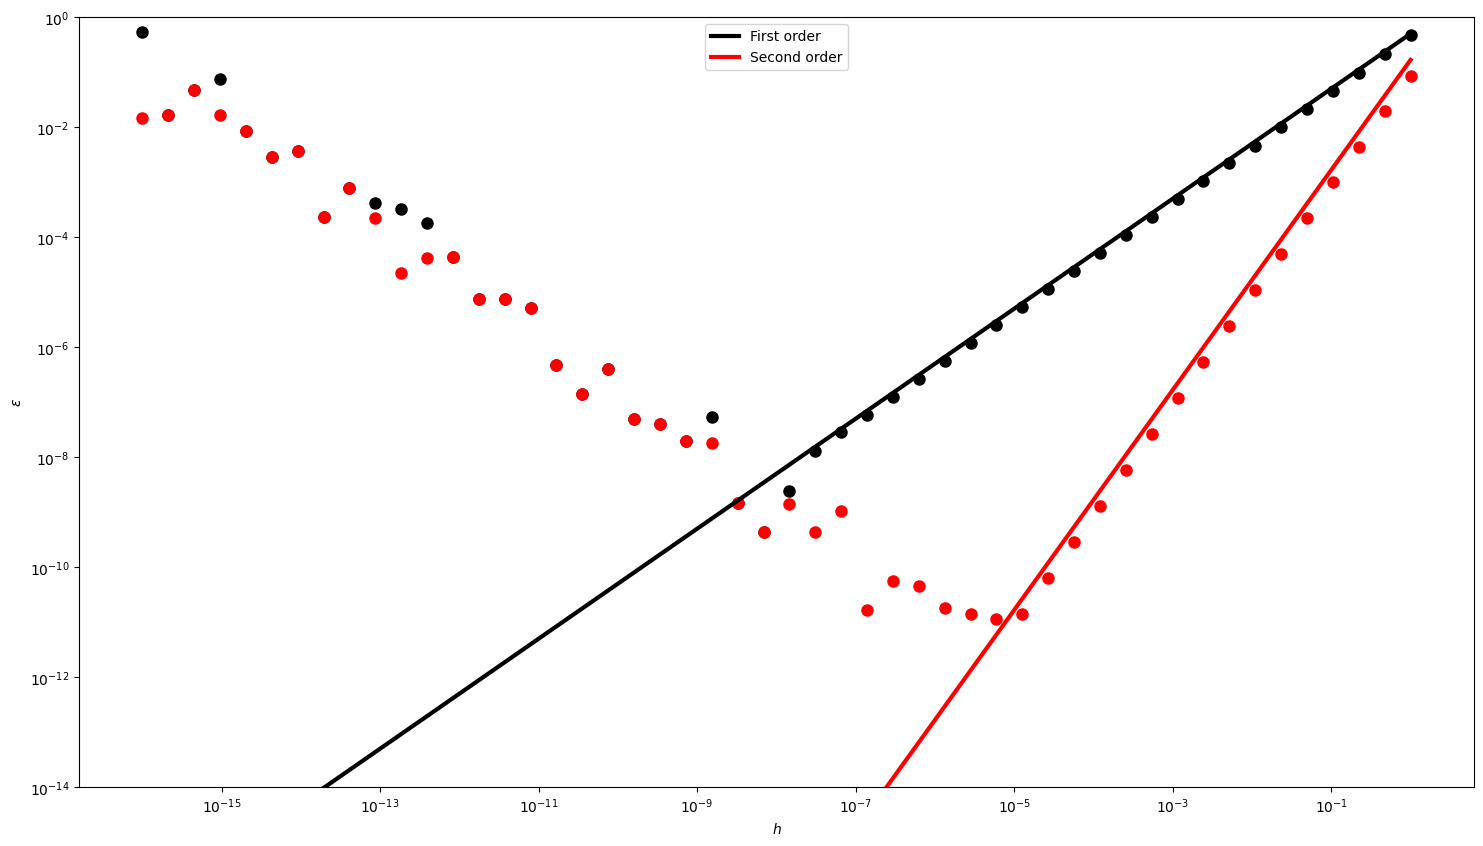

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def diff1(f, x0, h):
    return (f(x0 + h) - f(x0)) / h

def diff2(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

hs = np.logspace(-16, 0, num=50) # h = 1e-16 ... 1
errs1 = []
errs2 = []

for h in hs:
    errs1.append(abs(diff1(np.sin, 1, h) - np.cos(1)))
    errs2.append(abs(diff2(np.sin, 1, h) - np.cos(1)))

M2 = M3 = 1
plt.figure(figsize=(18, 10))
plt.loglog(hs, errs1, 'k.', ms=16)
plt.loglog(hs, errs2, 'r.', ms=16)
plt.loglog(hs, M2 * hs / 2, 'k-', label='First order', lw=3)
plt.loglog(hs, M3 * hs**2 / 6, 'r-', label='Second order', lw=3)
plt.ylim(1e-14, 1)
plt.xlabel('$h$')
plt.ylabel('$\\varepsilon$')
plt.legend(loc='upper center')
plt.show()

## 4. Погрешность данных. Шум.

Как мы знаем, данные, которые нам необходимо обрабатывать, также имеют свои погрешности помимо округления в памяти компьютера. К примеру, пусть у нас есть функция 

$$
f(x) = sin(x)*cos(x) + 0.25*x + \epsilon
$$

где $\epsilon \sim \mathcal{N}(0, 0.005)$

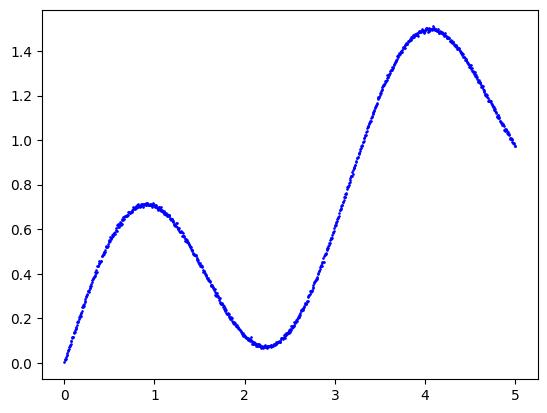

In [3]:
x = np.linspace(0, 5, 1000).reshape((-1, 1))
noise = np.random.normal(0, 0.005, size=x.shape)
y = np.sin(x)*np.cos(x) + 0.25*x + noise

plt.scatter(x, y, c = 'b', s= 0.8)
#plt.plot(x, y - noise, c = 'r', linewidth= 4)

Пусть хотим посчитать её производную численно в каждой точке. Применим рассказанную выше теорию и воспользуемся разностной схемой второго порядка точности на всех "внутренних" точках, и первого порядка на "крайних" и сравним с "истинной производной"

$$
f(x) = -sin^2(x) + cos^2(x) + 0.25 
$$

In [4]:
h = x[1, 0] - x[0, 0]
h

0.005005005005005005

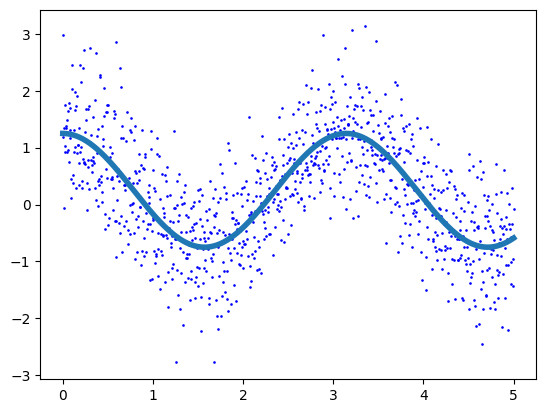

In [5]:
def diff2(y, h):

    y_diff = np.copy(y)

    y_diff[1:-1, 0] = (y[2:, 0] - y[:-2, 0])/2/h
    y_diff[0, 0] = (y[1, 0] - y[0, 0])/h
    y_diff[-1, 0] = (y[-1, 0] - y[-2, 0])/h
    
    return y_diff

y_diff_true = -np.sin(x)**2 + np.cos(x)**2 + 0.25

plt.plot(x, y_diff_true, linewidth= 4)
plt.scatter(x, diff2(y, h), c = 'b', s= 0.8)
#plt.plot(x, y_diff)

Не очень как-то. Результат был бы ещё хуже, если бы мы воспользовались конечной разностью первого порядка везде, а не только на крайних точках.

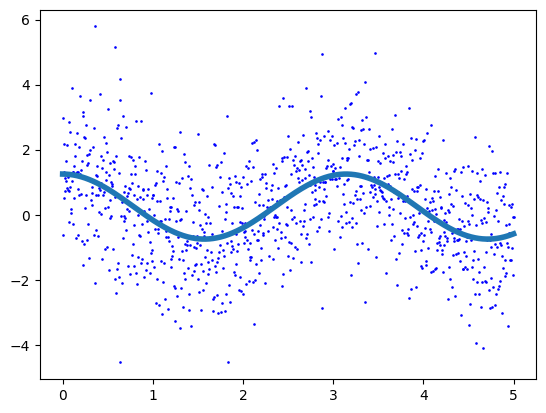

In [6]:
def diff1(y, h):
    y_diff = np.copy(y)

    y_diff[:-1, 0] = (y[1:, 0] - y[0:-1, 0])/h
    y_diff[-1, 0] = (y[-1, 0] - y[-2, 0])/h
    
    return y_diff

plt.plot(x, y_diff_true, linewidth= 4)
plt.scatter(x, diff1(y, h), c = 'b', s= 0.8)

Видим, что даже казалось бы ничтожная погрешность изначальных данных приводит к катастрофическому изменению численно определённой производной.

Как быть??

Ответ - фитить изначальные данные, чтобы избавиться от шума. Например, линейной регрессией, если точек не очень много. В духе прошлого семинара, будем фитить многочленами. 

In [7]:
k = 10

# Составляем матрицу объекты-признаки 
X = x**([i for i in range(k+1)])
np.linalg.matrix_rank(X)

11

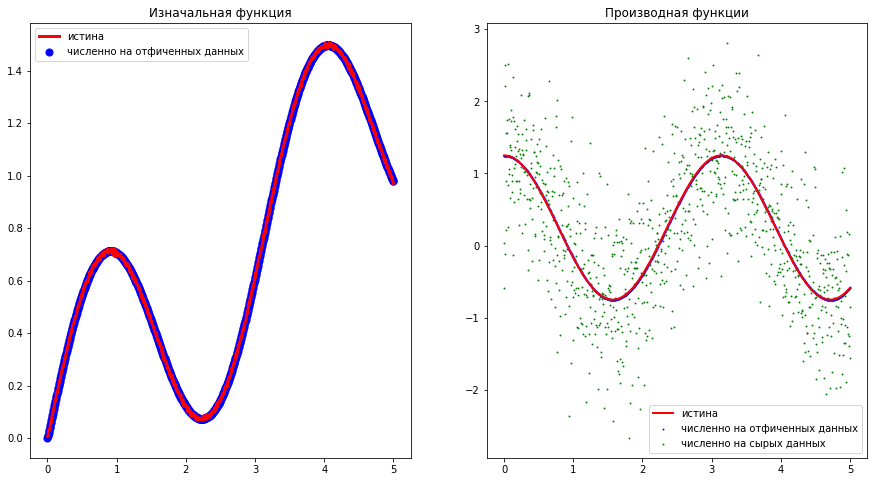

In [7]:
# C помощью sklearn решаем задачу линейной регрессии - он это сделает гораздо точнее и быстрее, чем мы с помощью numpy

from sklearn import linear_model as lm

lin_reg = lm.LinearRegression(fit_intercept=False)
lin_reg.fit(X, y) # Подаём на вход матрицу объекты-признаки а не иксы!11!!11!!1! 

y_predicted = lin_reg.predict(x**([i for i in range(k+1)])) # Не забываем, что для предсказания модели нужны все признаки в 
                                                            # матрицы объекты-признаки. Написал здесь её явный расчет, чтобы
                                                            # было видно, что можем заменить иксы

#Смотрим теперь на производную

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

ax[0].plot(x, y, linewidth= 3, c = 'r', label= "истина")
ax[0].scatter(x, y_predicted, c = 'b', s= 50, label= "численно на отфиченных данных")
ax[0].legend()
ax[0].title.set_text('Изначальная функция')

ax[1].plot(x, y_diff_true, linewidth= 2, c = 'r', label= "истина")
ax[1].scatter(x, diff2(y_predicted, h), c = 'b', s= 0.8, label= "численно на отфиченных данных")
ax[1].scatter(x, diff2(y, h), c = 'g', s= 0.8, label= "численно на сырых данных")
ax[1].legend()
ax[1].title.set_text('Производная функции')

plt.show()

Отлично! Смогли избавиться от шума и хорошо численно посчитать производную!

Возникает вопрос, какой порядок выбрать?

Слишком маленький порядок не может хорошо приблизить данные, а слишком большой приближает данные вместе с шумом. В машинном обучении эта проблема называется компромиссом между сдвигом и дисперсией (bias-variance tradeoff). Переход между данной границей хорошо заметен на графике loss в зависимости от степени многочлена. 

loss считаем на изначальных данных (на выборке test зашумленных данных, как в жизни) и на производной (на всей выборке, относительно значений без шума). Проверим, что наилучший фит изначальной функции приводит к тому, что численно посчитанная производная отфиченных данных будет наилучшей аппроксимацией истинной производной.

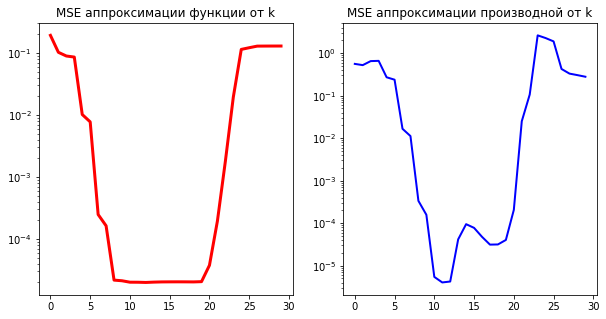

Видим, что нет особого смысла выбирать k>10, т.к. ошибка меняется незначительно.


In [8]:
from sklearn import metrics # лень опять реализовывать MSE Loss. Возьмём его отсюда.
from sklearn import model_selection as ms

x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2) # Разбиваем выборку



def make_model(k, x_train, y_train):
    
    in_reg = lm.LinearRegression(fit_intercept=False)
    lin_reg.fit(x_train**([i for i in range(k+1)]), y_train) # Обучаем на трэйне
    
    return lin_reg


ks = [k for k in range(30)]
losses_func = []
losses_diff = []


for k in ks:
    
    model = make_model(k, x_train, y_train)
    
    y_test_predicted = model.predict(x_test**([i for i in range(k+1)]))
    losses_func.append(metrics.mean_squared_error(y_test, y_test_predicted))
                       
    y_all_predicted = model.predict(x**([i for i in range(k+1)]))
    losses_diff.append(metrics.mean_squared_error(y_diff_true, diff2(y_all_predicted, h)))



fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].semilogy(ks, losses_func, linewidth= 3, c = 'r')
ax[0].title.set_text('MSE аппроксимации функции от k')

ax[1].semilogy(ks, losses_diff, linewidth= 2, c = 'b')
ax[1].title.set_text('MSE аппроксимации производной от k')

plt.show()

print("Видим, что нет особого смысла выбирать k>10, т.к. ошибка меняется незначительно.")

Таким образом, мы научились фильтровать шум в данных, чтобы свести к минимуму случайную погрешность данных.

Отдельно отметим, что второй график "в реальности" не получить, т.к. нам просто не будет известно аналитическая форма производной. Так что ориентируемся всё равно по первому графику

## Примеры

1. Полагая, что написанные числа верны только до последней значащей цифры, найти приближенные значения следующих величин:

a) $0,53784 \cdot 42,46578$;

б) $0,234+4,3758+15,372 \cdot 0,3762$;


2. Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку.


$$
f^{(2)}(x)=\frac{f(x+h)-2 f(x)+f(x-h)}{h^2}
$$

In [1]:
# Будем работать в библиотеке аналитических вычислений sympy
#!pip install sympy
import sympy as smp

x = smp.symbols('x')
f = smp.symbols('f', cls = smp.Function)(x) 

f

f(x)

In [2]:
f.series(x, 0, 5)

f(0) + x*Subs(Derivative(f(xi), xi), xi, 0) + x**2*Subs(Derivative(f(xi), (xi, 2)), xi, 0)/2 + x**3*Subs(Derivative(f(xi), (xi, 3)), xi, 0)/6 + x**4*Subs(Derivative(f(xi), (xi, 4)), xi, 0)/24 + O(x**5)

In [3]:
h = smp.symbols('h')

f_plus_h = smp.symbols('f', cls = smp.Function)(x+h) 

f_plus_h.series(h, 0, 5)

f(x) + h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + O(h**5)

In [5]:
f_minus_h = smp.symbols('f', cls = smp.Function)(x-h) 

f_minus_h.series(h, 0, 5)

f(x) - h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x) + h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x)/2 - h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x)/6 + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/24 + O(h**5)

In [6]:
chislitel = f_plus_h.series(h, 0, 5) - 2*f + f_minus_h.series(h, 0, 5)
chislitel

h**2*Subs(Derivative(f(_xi_1), (_xi_1, 2)), _xi_1, x) + h**4*Subs(Derivative(f(_xi_1), (_xi_1, 4)), _xi_1, x)/12 + O(h**5)

In [7]:
chislitel.simplify()

h**2*Derivative(f(x), (x, 2)) + h**4*Derivative(f(x), (x, 4))/12 + O(h**5)

In [8]:
(chislitel.simplify()/h**2).simplify()

Derivative(f(x), (x, 2)) + h**2*Derivative(f(x), (x, 4))/12 + O(h**3)

Итого ошибка метода есть

$$
\varepsilon_{\text{method}} = \frac{h^2 M_4}{12}
$$

Т.е. второй порядок аппроксимации

Ошибка округления же

$$
\varepsilon_{\text{round}} = \frac{4 \Delta f}{h^2}
$$

Суммарная погрешность тогда

$$
\varepsilon = \frac{h^2 M_4}{12} + \frac{4 \Delta f }{h^2}
$$

Необходимо аналитически найти её минимум. Опять же используем sympy

In [16]:
M_4, deltaf = smp.symbols(['M_4', 'Δf']) 
print(M_4, deltaf)

M_4 Δf


In [17]:
eps = smp.symbols('varepsilon')
eps

varepsilon

In [18]:
eps = h**2*M_4/12 + 4*deltaf/h**2
eps

M_4*h**2/12 + 4*Δf/h**2

In [19]:
eps_derivative = eps.diff(h)
eps_derivative

M_4*h/6 - 8*Δf/h**3

In [20]:
smp.solve(eps_derivative, h)

[-2*3**(1/4)*(Δf/M_4)**(1/4),
 2*3**(1/4)*(Δf/M_4)**(1/4),
 -2*3**(1/4)*I*(Δf/M_4)**(1/4),
 2*3**(1/4)*I*(Δf/M_4)**(1/4)]

Только второе решение положительное действительное

In [21]:
h_opt = smp.solve(eps_derivative, h)[1]
h_opt

2*3**(1/4)*(Δf/M_4)**(1/4)

In [22]:
eps_min = eps.replace(h, h_opt)
eps_min

sqrt(3)*M_4*sqrt(Δf/M_4)/3 + sqrt(3)*Δf/(3*sqrt(Δf/M_4))

In [23]:
eps_min = eps_min.simplify()
eps_min

2*sqrt(3)*Δf/(3*sqrt(Δf/M_4))

3. Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку.

$$
f^{(3)}(x)=\frac{f(x+2 h)-2 f(x+h)+2 f(x-h)-f(x-2 h)}{2 h^3}
$$

## Работа на дом

# Упражнение 1

Вычислить численно первую и вторую производные функции, заданной таблично с одинаковым шагом по иксам. Использовать схемы не менее второго порядка аппроксимации на внутренних точках. Известно, что шума нет.

Прим.: Не забудьте перевести питоновские списки [...] в нампаевские с помощью np.array([...])

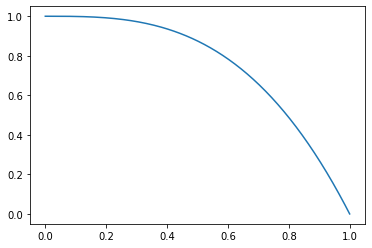

In [24]:
x = [0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
       0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
       0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
       0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
       0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
       0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
       0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
       0.35175879, 0.35678392, 0.36180905, 0.36683417, 0.3718593 ,
       0.37688442, 0.38190955, 0.38693467, 0.3919598 , 0.39698492,
       0.40201005, 0.40703518, 0.4120603 , 0.41708543, 0.42211055,
       0.42713568, 0.4321608 , 0.43718593, 0.44221106, 0.44723618,
       0.45226131, 0.45728643, 0.46231156, 0.46733668, 0.47236181,
       0.47738693, 0.48241206, 0.48743719, 0.49246231, 0.49748744,
       0.50251256, 0.50753769, 0.51256281, 0.51758794, 0.52261307,
       0.52763819, 0.53266332, 0.53768844, 0.54271357, 0.54773869,
       0.55276382, 0.55778894, 0.56281407, 0.5678392 , 0.57286432,
       0.57788945, 0.58291457, 0.5879397 , 0.59296482, 0.59798995,
       0.60301508, 0.6080402 , 0.61306533, 0.61809045, 0.62311558,
       0.6281407 , 0.63316583, 0.63819095, 0.64321608, 0.64824121,
       0.65326633, 0.65829146, 0.66331658, 0.66834171, 0.67336683,
       0.67839196, 0.68341709, 0.68844221, 0.69346734, 0.69849246,
       0.70351759, 0.70854271, 0.71356784, 0.71859296, 0.72361809,
       0.72864322, 0.73366834, 0.73869347, 0.74371859, 0.74874372,
       0.75376884, 0.75879397, 0.7638191 , 0.76884422, 0.77386935,
       0.77889447, 0.7839196 , 0.78894472, 0.79396985, 0.79899497,
       0.8040201 , 0.80904523, 0.81407035, 0.81909548, 0.8241206 ,
       0.82914573, 0.83417085, 0.83919598, 0.84422111, 0.84924623,
       0.85427136, 0.85929648, 0.86432161, 0.86934673, 0.87437186,
       0.87939698, 0.88442211, 0.88944724, 0.89447236, 0.89949749,
       0.90452261, 0.90954774, 0.91457286, 0.91959799, 0.92462312,
       0.92964824, 0.93467337, 0.93969849, 0.94472362, 0.94974874,
       0.95477387, 0.95979899, 0.96482412, 0.96984925, 0.97487437,
       0.9798995 , 0.98492462, 0.98994975, 0.99497487, 1.        ]

y = [1.        , 0.99999987, 0.99999898, 0.99999657, 0.99999188,
       0.99998414, 0.99997259, 0.99995648, 0.99993503, 0.99990749,
       0.99987311, 0.9998311 , 0.99978073, 0.99972121, 0.9996518 ,
       0.99957173, 0.99948024, 0.99937657, 0.99925995, 0.99912963,
       0.99898485, 0.99882484, 0.99864883, 0.99845608, 0.99824582,
       0.99801728, 0.99776971, 0.99750235, 0.99721442, 0.99690518,
       0.99657386, 0.9962197 , 0.99584194, 0.99543981, 0.99501256,
       0.99455942, 0.99407964, 0.99357244, 0.99303708, 0.99247278,
       0.99187879, 0.99125435, 0.99059868, 0.98991105, 0.98919067,
       0.98843679, 0.98764865, 0.98682549, 0.98596655, 0.98507106,
       0.98413826, 0.9831674 , 0.9821577 , 0.98110842, 0.98001878,
       0.97888803, 0.9777154 , 0.97650014, 0.97524148, 0.97393866,
       0.97259092, 0.97119749, 0.96975763, 0.96827056, 0.96673552,
       0.96515176, 0.96351851, 0.96183501, 0.9601005 , 0.95831421,
       0.95647539, 0.95458327, 0.9526371 , 0.95063611, 0.94857954,
       0.94646663, 0.94429662, 0.94206875, 0.93978224, 0.93743636,
       0.93503032, 0.93256337, 0.93003476, 0.92744371, 0.92478947,
       0.92207128, 0.91928837, 0.91643998, 0.91352535, 0.91054373,
       0.90749434, 0.90437643, 0.90118924, 0.897932  , 0.89460395,
       0.89120434, 0.88773239, 0.88418735, 0.88056847, 0.87687497,
       0.87310609, 0.86926108, 0.86533917, 0.8613396 , 0.85726161,
       0.85310444, 0.84886732, 0.84454951, 0.84015022, 0.83566871,
       0.83110421, 0.82645596, 0.8217232 , 0.81690516, 0.81200109,
       0.80701023, 0.80193181, 0.79676507, 0.79150925, 0.78616359,
       0.78072732, 0.7751997 , 0.76957995, 0.76386732, 0.75806103,
       0.75216034, 0.74616447, 0.74007268, 0.73388419, 0.72759824,
       0.72121409, 0.71473095, 0.70814808, 0.7014647 , 0.69468007,
       0.6877934 , 0.68080395, 0.67371097, 0.66651367, 0.65921131,
       0.65180311, 0.64428834, 0.6366662 , 0.62893596, 0.62109682,
       0.61314806, 0.60508891, 0.59691858, 0.58863635, 0.58024142,
       0.57173307, 0.56311049, 0.55437295, 0.5455197 , 0.53654994,
       0.52746295, 0.51825794, 0.50893416, 0.49949084, 0.48992723,
       0.48024256, 0.47043606, 0.460507  , 0.45045459, 0.44027809,
       0.4299767 , 0.41954972, 0.40899632, 0.39831578, 0.38750735,
       0.37657023, 0.36550369, 0.35430695, 0.34297927, 0.33151985,
       0.31992798, 0.30820284, 0.29634371, 0.28434984, 0.27222042,
       0.25995474, 0.24755199, 0.23501146, 0.22233234, 0.20951388,
       0.19655537, 0.18345597, 0.17021499, 0.1568316 , 0.14330511,
       0.12963469, 0.11581964, 0.10185914, 0.08775246, 0.07349886,
       0.05909753, 0.04454776, 0.02984874, 0.01499976, 0.        ]

plt.plot(x, y)

# Упражнение 2

Вычислить численно первую и вторую производные функции, заданной таблично с одинаковым шагом по иксам. Использовать схемы не менее второго порядка аппроксимации на внутренних точках. Данные теперь щашумлены ;).

Прим.: Не забудьте перевести питоновские списки [...] в нампаевские с помощью np.array([...])

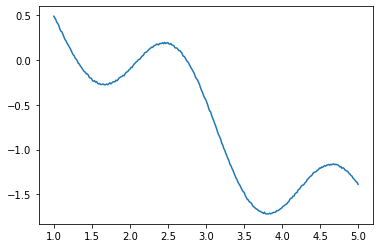

In [25]:
x = [1.        , 1.01337793, 1.02675585, 1.04013378, 1.05351171,
       1.06688963, 1.08026756, 1.09364548, 1.10702341, 1.12040134,
       1.13377926, 1.14715719, 1.16053512, 1.17391304, 1.18729097,
       1.2006689 , 1.21404682, 1.22742475, 1.24080268, 1.2541806 ,
       1.26755853, 1.28093645, 1.29431438, 1.30769231, 1.32107023,
       1.33444816, 1.34782609, 1.36120401, 1.37458194, 1.38795987,
       1.40133779, 1.41471572, 1.42809365, 1.44147157, 1.4548495 ,
       1.46822742, 1.48160535, 1.49498328, 1.5083612 , 1.52173913,
       1.53511706, 1.54849498, 1.56187291, 1.57525084, 1.58862876,
       1.60200669, 1.61538462, 1.62876254, 1.64214047, 1.65551839,
       1.66889632, 1.68227425, 1.69565217, 1.7090301 , 1.72240803,
       1.73578595, 1.74916388, 1.76254181, 1.77591973, 1.78929766,
       1.80267559, 1.81605351, 1.82943144, 1.84280936, 1.85618729,
       1.86956522, 1.88294314, 1.89632107, 1.909699  , 1.92307692,
       1.93645485, 1.94983278, 1.9632107 , 1.97658863, 1.98996656,
       2.00334448, 2.01672241, 2.03010033, 2.04347826, 2.05685619,
       2.07023411, 2.08361204, 2.09698997, 2.11036789, 2.12374582,
       2.13712375, 2.15050167, 2.1638796 , 2.17725753, 2.19063545,
       2.20401338, 2.2173913 , 2.23076923, 2.24414716, 2.25752508,
       2.27090301, 2.28428094, 2.29765886, 2.31103679, 2.32441472,
       2.33779264, 2.35117057, 2.36454849, 2.37792642, 2.39130435,
       2.40468227, 2.4180602 , 2.43143813, 2.44481605, 2.45819398,
       2.47157191, 2.48494983, 2.49832776, 2.51170569, 2.52508361,
       2.53846154, 2.55183946, 2.56521739, 2.57859532, 2.59197324,
       2.60535117, 2.6187291 , 2.63210702, 2.64548495, 2.65886288,
       2.6722408 , 2.68561873, 2.69899666, 2.71237458, 2.72575251,
       2.73913043, 2.75250836, 2.76588629, 2.77926421, 2.79264214,
       2.80602007, 2.81939799, 2.83277592, 2.84615385, 2.85953177,
       2.8729097 , 2.88628763, 2.89966555, 2.91304348, 2.9264214 ,
       2.93979933, 2.95317726, 2.96655518, 2.97993311, 2.99331104,
       3.00668896, 3.02006689, 3.03344482, 3.04682274, 3.06020067,
       3.0735786 , 3.08695652, 3.10033445, 3.11371237, 3.1270903 ,
       3.14046823, 3.15384615, 3.16722408, 3.18060201, 3.19397993,
       3.20735786, 3.22073579, 3.23411371, 3.24749164, 3.26086957,
       3.27424749, 3.28762542, 3.30100334, 3.31438127, 3.3277592 ,
       3.34113712, 3.35451505, 3.36789298, 3.3812709 , 3.39464883,
       3.40802676, 3.42140468, 3.43478261, 3.44816054, 3.46153846,
       3.47491639, 3.48829431, 3.50167224, 3.51505017, 3.52842809,
       3.54180602, 3.55518395, 3.56856187, 3.5819398 , 3.59531773,
       3.60869565, 3.62207358, 3.63545151, 3.64882943, 3.66220736,
       3.67558528, 3.68896321, 3.70234114, 3.71571906, 3.72909699,
       3.74247492, 3.75585284, 3.76923077, 3.7826087 , 3.79598662,
       3.80936455, 3.82274247, 3.8361204 , 3.84949833, 3.86287625,
       3.87625418, 3.88963211, 3.90301003, 3.91638796, 3.92976589,
       3.94314381, 3.95652174, 3.96989967, 3.98327759, 3.99665552,
       4.01003344, 4.02341137, 4.0367893 , 4.05016722, 4.06354515,
       4.07692308, 4.090301  , 4.10367893, 4.11705686, 4.13043478,
       4.14381271, 4.15719064, 4.17056856, 4.18394649, 4.19732441,
       4.21070234, 4.22408027, 4.23745819, 4.25083612, 4.26421405,
       4.27759197, 4.2909699 , 4.30434783, 4.31772575, 4.33110368,
       4.34448161, 4.35785953, 4.37123746, 4.38461538, 4.39799331,
       4.41137124, 4.42474916, 4.43812709, 4.45150502, 4.46488294,
       4.47826087, 4.4916388 , 4.50501672, 4.51839465, 4.53177258,
       4.5451505 , 4.55852843, 4.57190635, 4.58528428, 4.59866221,
       4.61204013, 4.62541806, 4.63879599, 4.65217391, 4.66555184,
       4.67892977, 4.69230769, 4.70568562, 4.71906355, 4.73244147,
       4.7458194 , 4.75919732, 4.77257525, 4.78595318, 4.7993311 ,
       4.81270903, 4.82608696, 4.83946488, 4.85284281, 4.86622074,
       4.87959866, 4.89297659, 4.90635452, 4.91973244, 4.93311037,
       4.94648829, 4.95986622, 4.97324415, 4.98662207, 5.        ]

y = [ 0.48863805,  0.4706063 ,  0.4493648 ,  0.42075058,  0.40608114,
        0.38294133,  0.34397085,  0.32196163,  0.3140574 ,  0.28508636,
        0.2590824 ,  0.22879908,  0.21364165,  0.18871463,  0.17157309,
        0.14975436,  0.13267386,  0.1054287 ,  0.08140074,  0.05995963,
        0.04864072,  0.02048689,  0.00986834, -0.00683534, -0.03565149,
       -0.04383209, -0.06428567, -0.07931248, -0.09793194, -0.11519411,
       -0.13062949, -0.1359394 , -0.15451834, -0.15434391, -0.16995244,
       -0.19729437, -0.19916606, -0.20620754, -0.23002474, -0.23628555,
       -0.23047724, -0.24710707, -0.23942271, -0.25857637, -0.26678739,
       -0.26170215, -0.27284519, -0.27340328, -0.26849006, -0.27058684,
       -0.27805442, -0.27266571, -0.26813815, -0.27644061, -0.26521816,
       -0.25489861, -0.26611842, -0.25564442, -0.2452349 , -0.24137907,
       -0.24394094, -0.22478145, -0.23174912, -0.21952174, -0.20088855,
       -0.19503158, -0.18768235, -0.18261683, -0.17177333, -0.17668631,
       -0.15533076, -0.13822566, -0.13259038, -0.12373451, -0.10640144,
       -0.10027304, -0.0804523 , -0.08328208, -0.06070371, -0.04482286,
       -0.03343396, -0.02100707, -0.01258064,  0.00276372,  0.00705245,
        0.01533925,  0.03351731,  0.04558241,  0.05157895,  0.07602384,
        0.0857951 ,  0.08844834,  0.10029526,  0.11172865,  0.12137859,
        0.1322108 ,  0.14310398,  0.14042411,  0.15600623,  0.16158499,
        0.16661173,  0.17795138,  0.17420817,  0.16943876,  0.18398173,
        0.18447575,  0.18538053,  0.19310823,  0.18246343,  0.19667835,
        0.18487044,  0.18879618,  0.19523542,  0.18077048,  0.17602092,
        0.18393253,  0.16944479,  0.16357239,  0.15855583,  0.13623582,
        0.13497459,  0.13340937,  0.11753257,  0.10511337,  0.10509054,
        0.0877562 ,  0.07505764,  0.04466765,  0.04106671,  0.02698227,
        0.00408617, -0.01386932, -0.02437554, -0.04616   , -0.06965996,
       -0.09103768, -0.10782492, -0.12915359, -0.15054097, -0.18511282,
       -0.2045241 , -0.2199459 , -0.24437012, -0.26786494, -0.30492996,
       -0.33444034, -0.35923335, -0.39254697, -0.41916829, -0.43605909,
       -0.46252906, -0.49371472, -0.53304183, -0.56596648, -0.57574361,
       -0.61592146, -0.64552114, -0.67802708, -0.70343358, -0.73581649,
       -0.76749808, -0.80706539, -0.83514307, -0.85887137, -0.88694473,
       -0.92814296, -0.94889084, -0.98639813, -1.00937506, -1.04211274,
       -1.06868071, -1.09937414, -1.11997578, -1.16238816, -1.17877914,
       -1.20729979, -1.23115284, -1.25959016, -1.28481186, -1.3161271 ,
       -1.33420269, -1.36471453, -1.38270606, -1.40226966, -1.42646112,
       -1.44956427, -1.46870423, -1.47649288, -1.50829415, -1.53101375,
       -1.55332363, -1.56095535, -1.58092825, -1.58682895, -1.59585189,
       -1.6174715 , -1.63632323, -1.64085533, -1.65408224, -1.66148126,
       -1.66693371, -1.67880729, -1.68812533, -1.68746128, -1.69957483,
       -1.70198022, -1.71196058, -1.69797514, -1.71677912, -1.71644881,
       -1.71677748, -1.71727519, -1.70944014, -1.71558185, -1.71203251,
       -1.70384492, -1.70050829, -1.70057077, -1.69670383, -1.67977146,
       -1.68155394, -1.67529224, -1.66600175, -1.65911615, -1.65036756,
       -1.63486243, -1.62892397, -1.61816981, -1.61123198, -1.60474294,
       -1.58733502, -1.57801458, -1.5516538 , -1.54236321, -1.53941575,
       -1.52009207, -1.51827931, -1.49223717, -1.48353035, -1.47737445,
       -1.45020072, -1.44214587, -1.43053664, -1.40968572, -1.39821305,
       -1.39563639, -1.38451407, -1.36636951, -1.35802387, -1.33351002,
       -1.32367539, -1.30984424, -1.29798304, -1.29223666, -1.2780077 ,
       -1.25809695, -1.25328938, -1.24915647, -1.243037  , -1.22771404,
       -1.22354855, -1.20605964, -1.20801043, -1.19416947, -1.19887309,
       -1.18742172, -1.17901188, -1.18459576, -1.17420289, -1.16945966,
       -1.16534322, -1.17333321, -1.16421488, -1.16911536, -1.16131656,
       -1.15992369, -1.16795747, -1.16239026, -1.16862322, -1.16913217,
       -1.17802895, -1.19333929, -1.18737164, -1.20780522, -1.20185831,
       -1.20855227, -1.22559971, -1.23378326, -1.23833275, -1.24691611,
       -1.26466511, -1.27370955, -1.28863025, -1.29633105, -1.31891104,
       -1.32804598, -1.34375795, -1.35719863, -1.3663852 , -1.38759841]

plt.plot(x, y)

# Упражнение 3

Найдите погрешность метода и неустранимую погрешность при вычислениях по этой формуле. Найдите оптимальный шаг численного дифференцирования и минимально возможную ошибку.

$$
f^{(1)}\left(x_{0}\right) \approx \frac{1}{12 h}\left(f_{i-2}-8 f_{i-1}+8 f_{i+1}-f_{i+2}\right)
$$

# Упражнение 4

Чему равна погрешность в определении корней уравнения $a x^3+b x^2=0$, если $a=1 \pm 10^{-3}, b=-4 \pm 10^{-3}$ ?

# Упражнение 5

Пусть задана последовательность чисел $x_n, n=0,1,2, \ldots$, причем $x_{n+1}-5 x_n=4$, а $x_0$ известно с относительной погрешностью $10^{-6} .$ При каких значениях $x_0$ относительная погрешность при вычислении $x_n$ будет быстро возрастать с ростом $n$ ?